In [19]:
import numpy as np
import matplotlib.pyplot as plt

L = 100  # Number of datasets
N = 25  # Number of data points per dataset
noise_std_dev = 0.3  # Standard deviation of Gaussian noise
np.random.seed(42)


# True underlying function
def true_function(x):
    return np.sin(2 * np.pi * x)


# print(f"Parameters for Data Generation:")
# print(f"  Number of datasets (L): {L}")
# print(f"  Datapoints per dataset (N): {N}")
# print(f"  Noise standard deviation: {noise_std_dev}")
# print("True function: sin(2 * pi * x)")
# print("Imports and initial setup complete.\n")

In [20]:
print("--- Part (a) Generating Data sets ---")
datasets_x = []
datasets_t = []  # t for target (noisy y)
datasets_t_true = []  # true y for reference

x_i_common = np.linspace(0, 1, N)  # Evenly spaced x values, same for all datasets

for i in range(L):
    t_true_i = true_function(x_i_common)
    t_noisy_i = t_true_i + np.random.normal(0, noise_std_dev, N)

    datasets_x.append(x_i_common)  # All x_i will be identical
    datasets_t.append(t_noisy_i) # All different y
    datasets_t_true.append(t_true_i)

# print(f"Generated {L} datasets.")
# print(
#     f"Shape of datasets_x[0] (common x-values for all datasets): {datasets_x[0].shape}"
# )
# print(
#     f"Shape of datasets_t[0] (target values for the first dataset): {datasets_t[0].shape}"
# )

# print(f"\nFirst 5 x-values (from datasets_x[0]):")
# print(datasets_x[0][:5])
# print(f"\nFirst 5 true target values (from datasets_t_true[0]):")
# print(datasets_t_true[0][:5])
# print(f"\nFirst 5 noisy target values (from datasets_t[0]):")
# print(datasets_t[0][:5])


# Plot one example dataset to verify
# plt.figure(figsize=(8, 5))
# plt.scatter(
#     datasets_x[0],
#     datasets_t[0],
#     label=f"Noisy Datapoints (Dataset 0)",
#     color="blue",
#     s=50,
#     facecolors="none",
# )
# x_plot_dense_true_func = np.linspace(0, 1, 200)
# plt.plot(
#     x_plot_dense_true_func,
#     true_function(x_plot_dense_true_func),
#     label="True Sinusoidal Function",
#     color="green",
#     linestyle="--",
# )
# plt.title("Example of a Generated Dataset")
# plt.xlabel("x")
# plt.ylabel("t")
# plt.legend()
# plt.grid(True, linestyle=":", alpha=0.7)
# plt.show()

--- Part (a) Generating Data sets ---


In [21]:
print("--- Part (b) Defining Model (Gaussian Basis Functions) ---")

M_basis = 24  # Number of Gaussian basis functions
M_biases = 1  #  Number of bias term w0
M_total_params = M_basis + M_biases  # Total parameters M


s_gaussian = 0.1  # Width/scale of Gaussian basis functions - hyperparameter
mus_gaussian = np.linspace(0, 1, M_basis)  # Centers of Gaussians

# print(f"Model Parameters:")
# print(f"  Number of Gaussian basis functions (M_basis): {M_basis}")
# print(
#     f"  Total number of model parameters (M_total_params = M_basis + 1 bias): {M_total_params}"
# )
# print(f"  Width (scale 's') of Gaussian basis functions: {s_gaussian}")
# print(f"  First 5 Gaussian centers (mus): {mus_gaussian[:5]}")
# if M_basis > 5:
#     print(f"  Last 5 Gaussian centers (mus): {mus_gaussian[-5:]}")


def gaussian_basis_function(x, mu, s_param):
    return np.exp(-0.5 * ((x - mu) / s_param) ** 2)


def create_design_matrix(x_input, mus_list, scale_param):
    N_points = len(x_input)
    M_gaussians = len(mus_list)
    phi = np.ones((N_points, M_gaussians + 1))
    for j in range(M_gaussians):
        phi[:, j + 1] = gaussian_basis_function(x_input, mus_list[j], scale_param)
    return phi


phi_example = create_design_matrix(datasets_x[0], mus_gaussian, s_gaussian)
# print(
#     f"\nExample Design Matrix (Phi) for the first dataset (N={N}, M_total_params={M_total_params}):"
# )
# print(f"  Shape of Phi: {phi_example.shape}")
# assert phi_example.shape == (N, M_total_params), "Design matrix shape is incorrect!"
# print(f"  First 3 rows and first 4 columns of Phi_example:\n{phi_example[:3, :4]}")
# print("Gaussian basis function and design matrix creation functions defined.\n")

--- Part (b) Defining Model (Gaussian Basis Functions) ---


In [22]:
# print("--- Part (c) Regularized Least Squares (Ridge Regression) ---")


# def fit_regularized_least_squares(phi_matrix, t_vector, lambda_reg):
#     M_params = phi_matrix.shape[1]
#     identity_matrix = np.identity(M_params)
#     A = phi_matrix.T @ phi_matrix + lambda_reg * identity_matrix
#     b = phi_matrix.T @ t_vector
#     try:
#         weights = np.linalg.solve(A, b)
#     except np.linalg.LinAlgError:
#         print(
#             f"Warning: Singular matrix encountered with lambda={lambda_reg}. Using pseudo-inverse."
#         )
#         weights = np.linalg.pinv(A) @ b
#     return weights


# def predict(phi_matrix, weights):
#     return phi_matrix @ weights


# print("Regularized least squares (fit and predict) functions defined.")
# # Testing with dummy values (optional, but good for verifying function)
# dummy_phi = np.array([[1, 0.1, 0.2], [1, 0.5, 0.6], [1, 0.9, 1.0]])
# dummy_t = np.array([0.2, 0.8, 0.4])
# dummy_lambda = 0.1
# dummy_w = fit_regularized_least_squares(dummy_phi, dummy_t, dummy_lambda)
# print(
#     f"Example: Dummy weights for a small test case (lambda={dummy_lambda}): {dummy_w}"
# )
# print("Functions for fitting and prediction are ready.\n")


print("--- Part (c) Regularized Least Squares (Ridge Regression) ---")

def fit_regularized_least_squares(phi_matrix, t_vector, lambda_reg):
    M_params = phi_matrix.shape[1]
    identity_matrix = np.identity(M_params)
    # Equation for Ridge Regression: (Phi^T Phi + lambda * I) w = Phi^T t
    A = phi_matrix.T @ phi_matrix + lambda_reg * identity_matrix
    b = phi_matrix.T @ t_vector
    try:
        weights = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        print(
            f"Warning: Singular matrix encountered with lambda={lambda_reg}.\n"
            f"Using pseudo-inverse."
        )
        weights = np.linalg.pinv(A) @ b
    return weights

def predict(phi_matrix, weights):
    return phi_matrix @ weights

print("Regularized least squares (fit and predict) functions defined.")

# Testing with generated phi_example (from Cell 3, using datasets_x[0]) 
# and corresponding targets datasets_t[0] (from Cell 1).
# This verifies the functions with actual-sized data.
# We assume phi_example and datasets_t are in the global scope from previous cells.

dummy_phi = phi_example         # Using phi_example generated in Cell 3 (from datasets_x[0])
dummy_t = datasets_t[0]         # Using targets from the first dataset (datasets_t[0])
dummy_lambda = 0.1              # A test lambda value, same as in the original dummy test

# The variable names dummy_phi, dummy_t are kept for minimal change from the original cell structure,
# but they now hold actual generated data, not small arbitrary dummy values.
# dummy_phi will have shape (N, M_total_params) = (25, 25)
# dummy_t will have shape (N,) = (25,)

dummy_w = fit_regularized_least_squares(dummy_phi, dummy_t, dummy_lambda)

# The original print statement was for a very small dummy_w.
# Since dummy_w now has M_total_params (25) elements, we print only the first few.
print(
    f"Example: Weights calculated using data from dataset 0 (lambda={dummy_lambda}), "
    f"first 5 of {len(dummy_w)} elements:\n{dummy_w[:5]}"
)
# Original print statement for dummy_w (when it was from small arbitrary dummy data):
# print(
#    f"Example: Dummy weights for a small test case (lambda={dummy_lambda}):\n"
#    f"{dummy_w}" # This would have been something like →{dummy_w} in the notebook output
# )

print("Functions for fitting and prediction are ready.\n")

--- Part (c) Regularized Least Squares (Ridge Regression) ---
Regularized least squares (fit and predict) functions defined.
Example: Weights calculated using data from dataset 0 (lambda=0.1), first 5 of 25 elements:
[-0.06202511 -0.16228473  0.04586907  0.21037393  0.2485465 ]
Functions for fitting and prediction are ready.



In [23]:
print("--- Part (e) Choosing Regularization Coefficients (λ) ---")

lambda_values_chosen = [
    1e-9,  # Very low lambda
    1e-1,  # Medium lambda
    1.0,  # High lambda
]

lambda_simple_names = [
    f"Low λ ({lambda_values_chosen[0]:.0e})",
    f"Medium λ ({lambda_values_chosen[1]:.1f})",
    f"High λ ({lambda_values_chosen[2]:.1f})",
]

print(f"Chosen Regularization Coefficients (lambda values):")
for i, val in enumerate(lambda_values_chosen):
    print(f"  {lambda_simple_names[i]}: {val}")
print("These lambda values will be used for fitting the model.\n")

--- Part (e) Choosing Regularization Coefficients (λ) ---
Chosen Regularization Coefficients (lambda values):
  Low λ (1e-09): 1e-09
  Medium λ (0.1): 0.1
  High λ (1.0): 1.0
These lambda values will be used for fitting the model.



--- Part (f) & (g) Generating Plots for Bias-Variance Illustration ---
Prepared dense x-values (shape: (200,)) and corresponding design matrix (shape: (200, 25)) for plotting smooth curves.

--- Processing for: Low λ (1e-09) (λ = 1.00e-09) ---
  Obtained model parameters (weights w) for Dataset 0 with Low λ (1e-09):
    Shape of w: (25,)
    First 5 weights (w0 is bias): [ -70.23810765  182.99587485  -42.41088536 -700.30740893 1626.32411394]
  Stored 100 prediction curves for Low λ (1e-09). Shape: (100, 200)


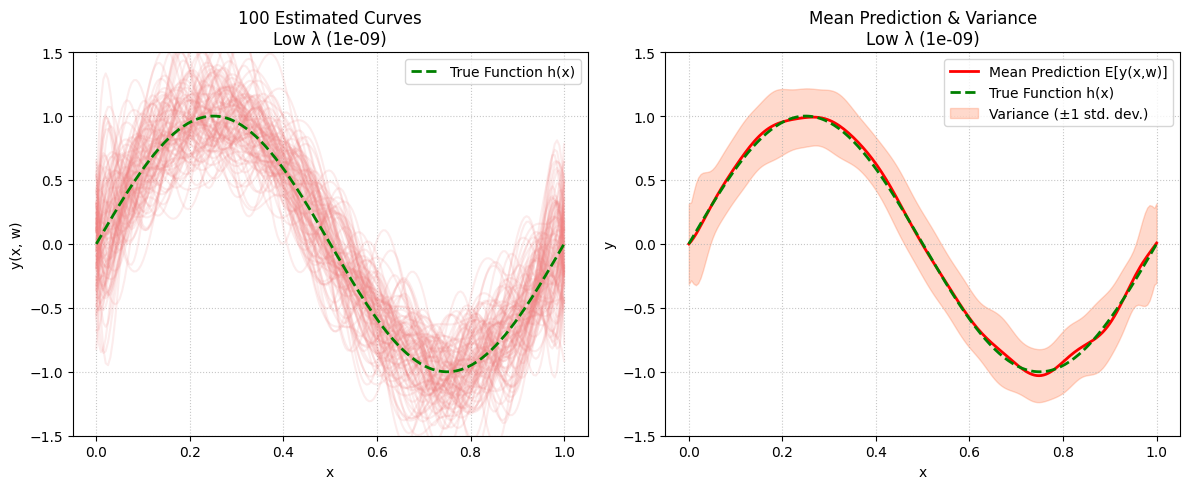


--- Processing for: Medium λ (0.1) (λ = 1.00e-01) ---
  Obtained model parameters (weights w) for Dataset 0 with Medium λ (0.1):
    Shape of w: (25,)
    First 5 weights (w0 is bias): [-0.06202511 -0.16228473  0.04586907  0.21037393  0.2485465 ]
  Stored 100 prediction curves for Medium λ (0.1). Shape: (100, 200)


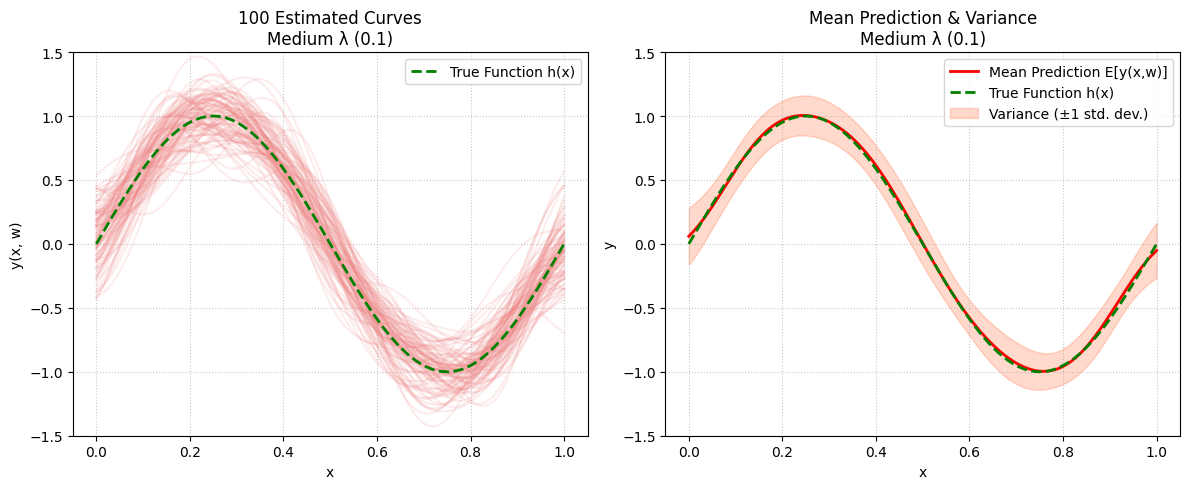


--- Processing for: High λ (1.0) (λ = 1.00e+00) ---
  Obtained model parameters (weights w) for Dataset 0 with High λ (1.0):
    Shape of w: (25,)
    First 5 weights (w0 is bias): [-0.04317645 -0.02875479  0.04003239  0.12073338  0.18670478]
  Stored 100 prediction curves for High λ (1.0). Shape: (100, 200)


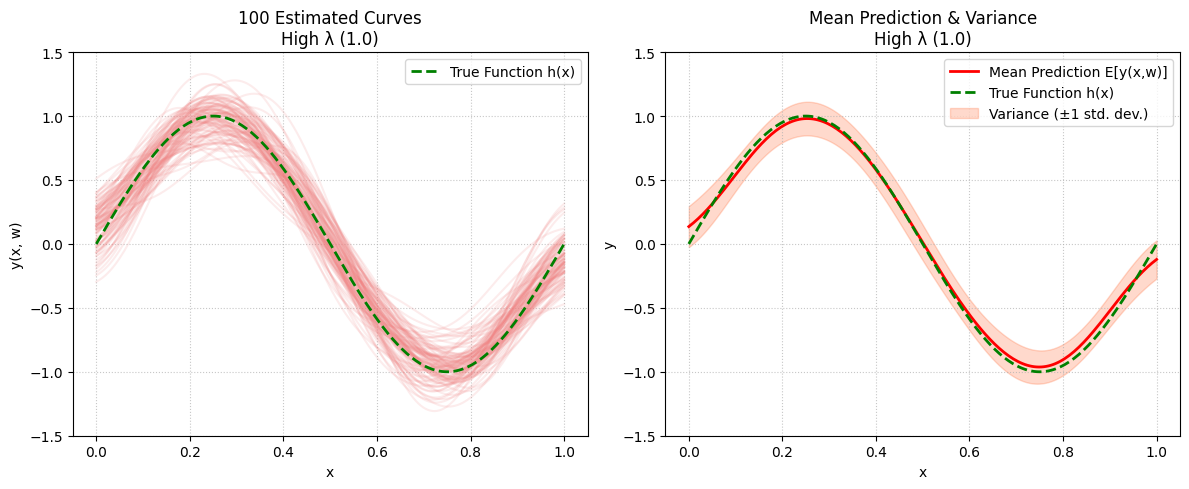


All plots displayed.



In [24]:
print("--- Part (f) & (g) Generating Plots for Bias-Variance Illustration ---")

x_plot_dense = np.linspace(0, 1, 200)
phi_plot_dense = create_design_matrix(x_plot_dense, mus_gaussian, s_gaussian)
print(
    f"Prepared dense x-values (shape: {x_plot_dense.shape}) and corresponding design matrix (shape: {phi_plot_dense.shape}) for plotting smooth curves."
)

all_predictions_by_lambda = {}

for i, lambda_reg_val in enumerate(lambda_values_chosen):
    current_lambda_name = lambda_simple_names[i]
    print(f"\n--- Processing for: {current_lambda_name} (λ = {lambda_reg_val:.2e}) ---")

    predictions_for_current_lambda_list = []

    # To print weights for one dataset (e.g., the first one) for this lambda
    first_dataset_weights_printed = False

    plt.figure(figsize=(12, 5))  # Figure for the two subplots for current lambda
    plt.subplot(1, 2, 1)  # Left subplot: 100 estimated curves

    for l_idx in range(L):  # Loop through each of the L datasets
        x_train_dataset = datasets_x[l_idx]
        t_train_dataset = datasets_t[l_idx]

        phi_train_dataset = create_design_matrix(
            x_train_dataset, mus_gaussian, s_gaussian
        )
        w_estimated = fit_regularized_least_squares(
            phi_train_dataset, t_train_dataset, lambda_reg_val
        )

        if (
            l_idx == 0 and not first_dataset_weights_printed
        ):  # Print weights for the first dataset only
            print(
                f"  Obtained model parameters (weights w) for Dataset 0 with {current_lambda_name}:"
            )
            print(f"    Shape of w: {w_estimated.shape}")
            print(f"    First 5 weights (w0 is bias): {w_estimated[:5]}")
            first_dataset_weights_printed = True

        y_pred_dense_single_fit = predict(phi_plot_dense, w_estimated)
        predictions_for_current_lambda_list.append(y_pred_dense_single_fit)
        plt.plot(x_plot_dense, y_pred_dense_single_fit, color="lightcoral", alpha=0.15)

    all_predictions_by_lambda[lambda_reg_val] = np.array(
        predictions_for_current_lambda_list
    )
    print(
        f"  Stored {L} prediction curves for {current_lambda_name}. Shape: {all_predictions_by_lambda[lambda_reg_val].shape}"
    )

    plt.plot(
        x_plot_dense,
        true_function(x_plot_dense),
        color="green",
        linestyle="--",
        linewidth=2,
        label="True Function h(x)",
    )
    plt.title(f"100 Estimated Curves\n{current_lambda_name}")
    plt.xlabel("x")
    plt.ylabel("y(x, w)")
    plt.ylim(-1.5, 1.5)
    plt.legend(loc="upper right")
    plt.grid(True, linestyle=":", alpha=0.7)

    plt.subplot(1, 2, 2)  # Right subplot: Mean and variance
    mean_prediction_curve = np.mean(all_predictions_by_lambda[lambda_reg_val], axis=0)
    std_dev_prediction_curves = np.std(
        all_predictions_by_lambda[lambda_reg_val], axis=0
    )

    plt.plot(
        x_plot_dense,
        mean_prediction_curve,
        color="red",
        linewidth=2,
        label="Mean Prediction E[y(x,w)]",
    )
    plt.plot(
        x_plot_dense,
        true_function(x_plot_dense),
        color="green",
        linestyle="--",
        linewidth=2,
        label="True Function h(x)",
    )
    plt.fill_between(
        x_plot_dense,
        mean_prediction_curve - std_dev_prediction_curves,
        mean_prediction_curve + std_dev_prediction_curves,
        color="orangered",
        alpha=0.2,
        label="Variance (±1 std. dev.)",
    )

    plt.title(f"Mean Prediction & Variance\n{current_lambda_name}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)
    plt.legend(loc="upper right")
    plt.grid(True, linestyle=":", alpha=0.7)

    plt.tight_layout()
    plt.show()

print("\nAll plots displayed.\n")

## Part (h) & (i): Bias-Variance Trade-off Observations

**Recap of Key Concepts:**
*   **Bias:** The difference between the average prediction of our model (the mean red curve in the right plots) and the true underlying function (green dashed curve). High bias means the model systematically misses the true function (underfitting).
*   **Variance:** The variability of the model's predictions for a given input point if we were to train it on different datasets. Visually, this is represented by the spread of the light red curves in the left plots, and the width of the orange shaded band in the right plots. High variance means the model is very sensitive to the specific training data (overfitting).
*   **Total Expected Error ≈ Bias² + Variance + Irreducible Error** (noise in data)
*   **Regularization (λ):** A technique to control model complexity. Higher λ implies stronger regularization, penalizing large weights more.

---

### Observations for Each Regularization Level:

(Refer to the plots and the printed outputs from Cell 7, e.g., the magnitude of weights for different lambdas)

**1. Low λ (e.g., `1.00e-09`):**
*   *Printed Weights (Dataset 0):* The weights (e.g., `w_estimated[:5]`) might show larger magnitudes compared to higher lambda values, reflecting the model's attempt to fit the data closely.
*   **Plot 1 (100 Estimated Curves):**
    *   *Observation:* The 100 individual estimated curves (light red) exhibit a **wide spread**. They wiggle significantly.
    *   *Interpretation:* **HIGH VARIANCE**. The model is overfitting.
*   **Plot 2 (Mean Estimated Curve & Variance):**
    *   *Observation (Mean Curve):* The mean estimated curve (solid red) tracks the true sinusoidal function (green dashed line) **very closely**.
    *   *Interpretation (Mean Curve):* **LOW BIAS**.
    *   *Observation (Variance Band):* The shaded orange area is **wide**.
    *   *Interpretation (Variance Band):* Confirms **HIGH VARIANCE**.
*   **Summary for Low λ:** Highly flexible, low bias, high variance. The model fits noise.

**2. Medium λ (e.g., `0.1`):**
*   *Printed Weights (Dataset 0):* The magnitudes of weights (e.g., `w_estimated[:5]`) are likely smaller/more constrained than for low λ.
*   **Plot 1 (100 Estimated Curves):**
    *   *Observation:* The spread of the 100 individual curves is noticeably **narrower**.
    *   *Interpretation:* **REDUCED VARIANCE**.
*   **Plot 2 (Mean Estimated Curve & Variance):**
    *   *Observation (Mean Curve):* The mean estimated curve (solid red) is **reasonably close** to the true function.
    *   *Interpretation (Mean Curve):* **BIAS** might be slightly higher than for low λ, but relatively low.
    *   *Observation (Variance Band):* The shaded orange area is **narrower**.
    *   *Interpretation (Variance Band):* Shows **REDUCED VARIANCE**.
*   **Summary for Medium λ:** Good balance. Regularization reduces variance with a slight potential increase in bias.

**3. High λ (e.g., `1.0`):**
*   *Printed Weights (Dataset 0):* The weights (e.g., `w_estimated[:5]`) are likely very small, with many close to zero, especially for the basis functions. The bias term `w0` might dominate if it's trying to fit the average of the sine wave.
*   **Plot 1 (100 Estimated Curves):**
    *   *Observation:* The 100 individual curves are **very tightly clustered** and much flatter.
    *   *Interpretation:* **VERY LOW VARIANCE**.
*   **Plot 2 (Mean Estimated Curve & Variance):**
    *   *Observation (Mean Curve):* The mean estimated curve (solid red) is **noticeably different** and much simpler than the true function.
    *   *Interpretation (Mean Curve):* **HIGH BIAS**. The model is underfitting.
    *   *Observation (Variance Band):* The shaded orange area is **very narrow**.
    *   *Interpretation (Variance Band):* Confirms **VERY LOW VARIANCE**.
*   **Summary for High λ:** Over-regularized, low variance, high bias. Model is too simple.

---

### Describing the Bias-Variance Trade-off:

The six plots and the behavior of the estimated weights for different λ values clearly demonstrate the bias-variance trade-off:

*   **Low λ:** High model complexity allowed, leading to low bias (average fit is good) but high variance (fits vary wildly with data). Weights can be large.
*   **High λ:** Low model complexity forced by regularization, leading to high bias (average fit is poor, too simple) but low variance (fits are very stable). Weights are small.
*   **Medium λ:** Aims for a sweet spot where the model is complex enough to capture the true signal (moderate bias) but not so complex that it fits the noise (moderate variance). Weights are balanced.

The parameters used (`L=100`, `N=25`, `M_total_params=25`, `noise_std_dev=0.3`, `s_gaussian=0.1`) create a scenario where overfitting is likely without regularization because the number of parameters is equal to the number of data points. Regularization (λ) is crucial for controlling this.